In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


c:\Users\ASUS\Documents\Study Material\Development\FrameWorks\Tensorflow\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

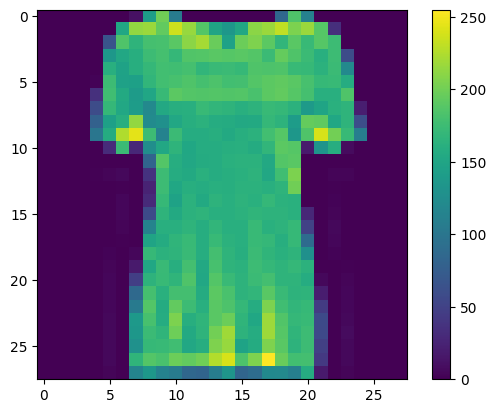

In [10]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

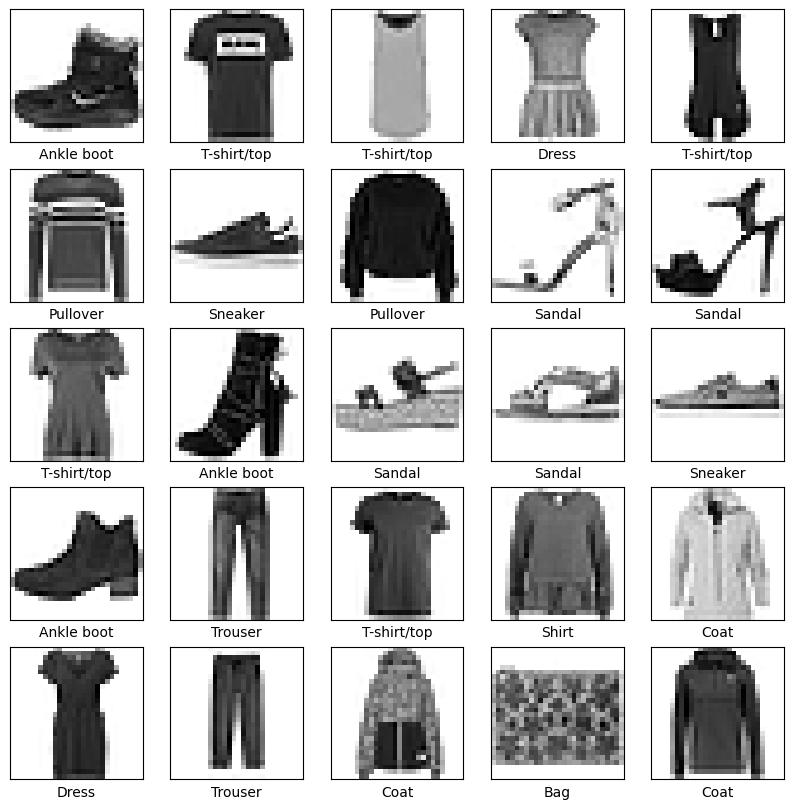

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

1.The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

2.After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\ASUS\Documents\Study Material\Development\FrameWorks\Tensorflow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


() Compile the model
-> Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Optimizer —This is how the model is updated based on the data it sees and its loss function.
2. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])


training  the model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8242 - loss: 0.5001
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8646 - loss: 0.3768
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8771 - loss: 0.3390
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8836 - loss: 0.3141
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8917 - loss: 0.2946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8959 - loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9003 - loss: 0.2688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9040 - loss: 0.2574
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9092 - loss: 0.2446
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9112 - loss: 0.2370


evaluate the model

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


#accuracy of the testing data is the less then training this means that model
# is overfitted.

313/313 - 1s - 3ms/step - accuracy: 0.8875 - loss: 0.3312

Test accuracy: 0.887499988079071


make predictions


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
predictions[0]

array([2.3518771e-07, 2.4801250e-10, 2.1364972e-10, 1.4958917e-10,
       3.4333596e-09, 1.5195936e-04, 6.7104634e-07, 5.3944993e-03,
       5.5207084e-07, 9.9445206e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

np.int64(9)

In [24]:
test_labels[0]

np.uint8(9)

functions to graph the full set of 10 class predictions.



In [30]:
def plot_images(i, predictions_array,true_label,img):
    true_label, img = true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f} % ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

() verify predictions 

-> With the model trained, you can use it to make predictions about some images.

-> Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.


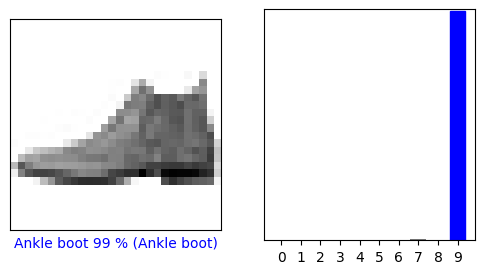

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

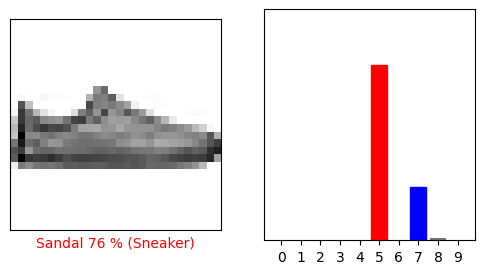

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

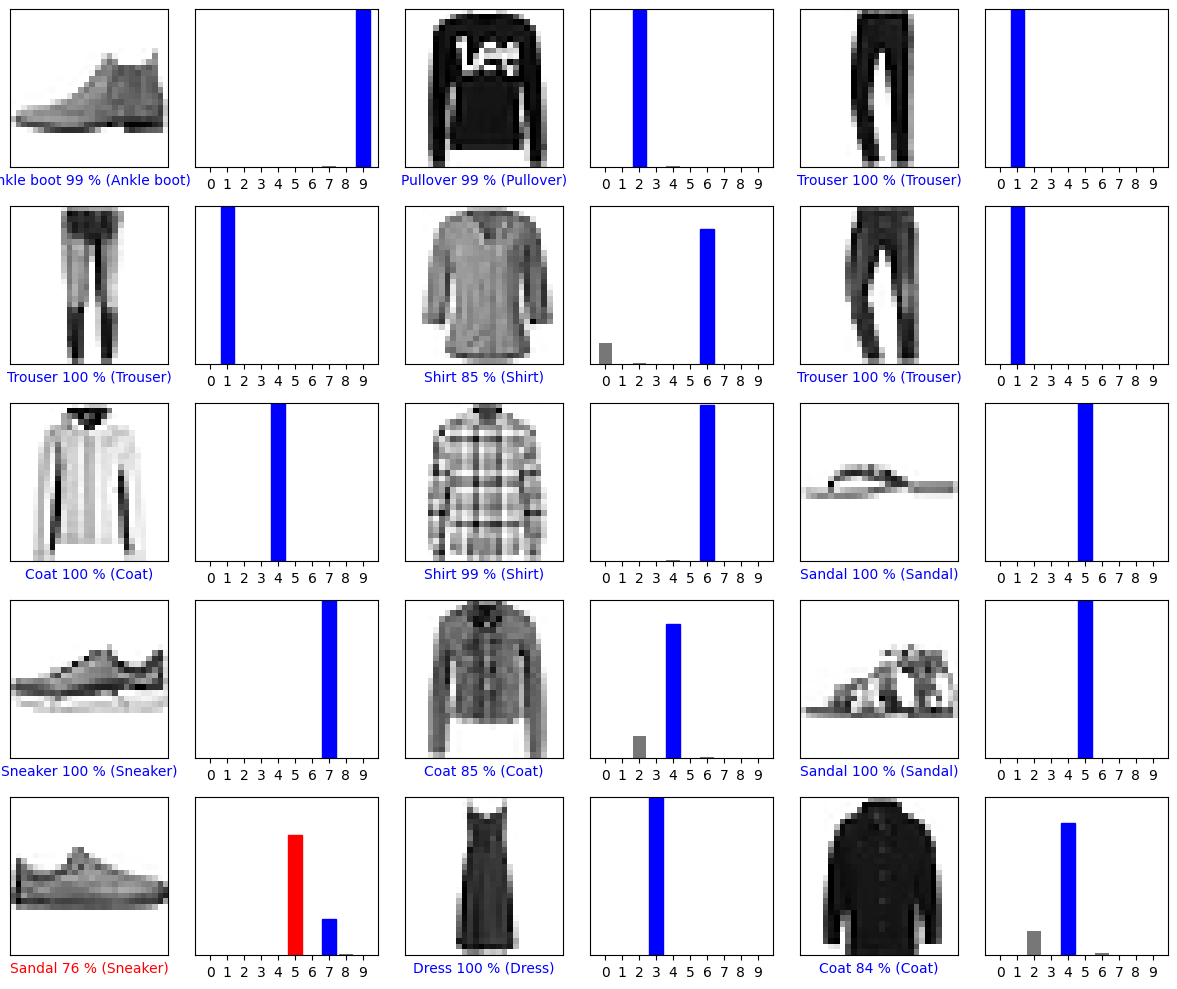

In [33]:
nums_rows = 5
nums_cols = 3
nums_images= nums_rows*nums_cols

plt.figure(figsize=(2*2*nums_cols, 2*nums_rows))
for i in range(nums_images):
    plt.subplot(nums_rows, 2*nums_cols, 2*i + 1)
    plot_images(i, predictions[i], test_labels, test_images)
    plt.subplot(nums_rows, 2*nums_cols, 2*i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [34]:
img = test_images[1]

print(img.shape)

(28, 28)


In [35]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[4.5711623e-04 4.2582156e-14 9.9346101e-01 1.0604512e-10 5.8075315e-03
  6.8857420e-13 2.7423113e-04 8.6773075e-13 9.2683680e-11 9.2924624e-14]]


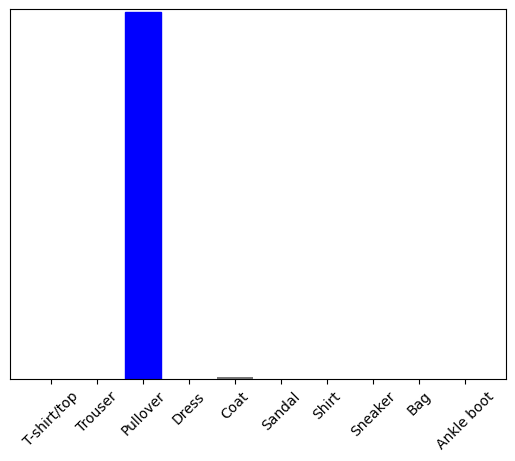

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [42]:
np.argmax(predictions_single[0])

np.int64(2)